In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/corpus.csv')
df

,Auteurs,Titres,Fichier,Date_edition,Genre,Genre_sum,Gallica,Gallica_TXT,Wikisource,Autres_sources
0,Maurice Barrès,Adieu à Moréas,Barrès_Adieu à Moréas.txt,1910,roman,roman,NaN,NaN,https://fr.m.wikisource.org/wiki/Adieu_%C3%A0_...,NaN
1,Maurice Barrès,Au service de l’Allemagne,Barrès_Au service de l’Allemagne.txt,1905,roman,roman,/12148/bpt6k5452401r,Oui,NaN,NaN
2,Maurice Barrès,Ce que j’ai vu à Rennes,NaN,1904,pamphlet,pamphlet,NaN,NaN,NaN,NaN
3,Maurice Barrès,Ce que j’ai vu au temps du Panama,NaN,1906,pamphlet,pamphlet,NaN,NaN,NaN,NaN
4,Maurice Barrès,Chronique de la Grande Guerre (14 volumes),NaN,1924,pamphlet,pamphlet,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
357,Laurent Tailhade,Le Jardin des rêves,Tailhade_Le Jardin des rêves.txt,1880,poésie,NaN,NaN,NaN,NaN,NaN
358,Laurent Tailhade,Terre latine,Tailhade_Terre latine.txt,1898,article,article,NaN,NaN,NaN,NaN
359,Laurent Tailhade,La Douleur,Tailhade_La Douleur.txt,1914,essai,essai,NaN,NaN,NaN,NaN
360,Laurent Tailhade,La Feuille à l’envers,Tailhade_La Feuille à lenvers.txt,1909,théâtre,NaN,NaN,NaN,NaN,NaN


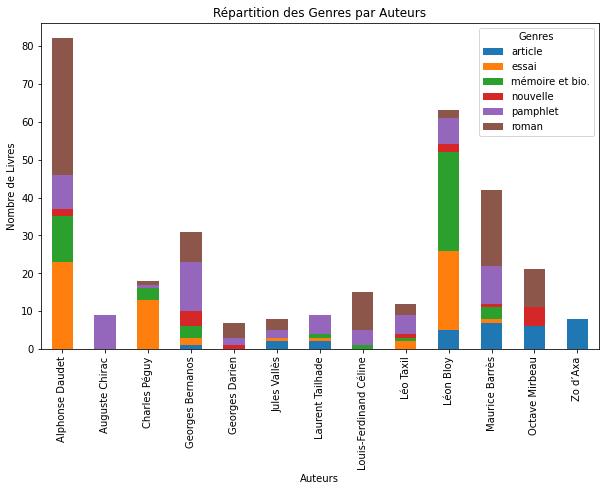

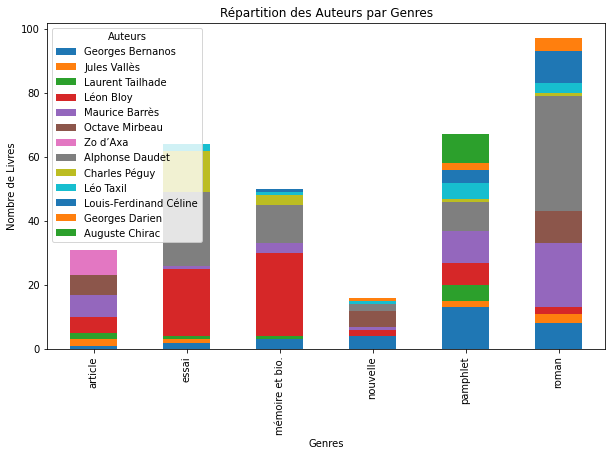

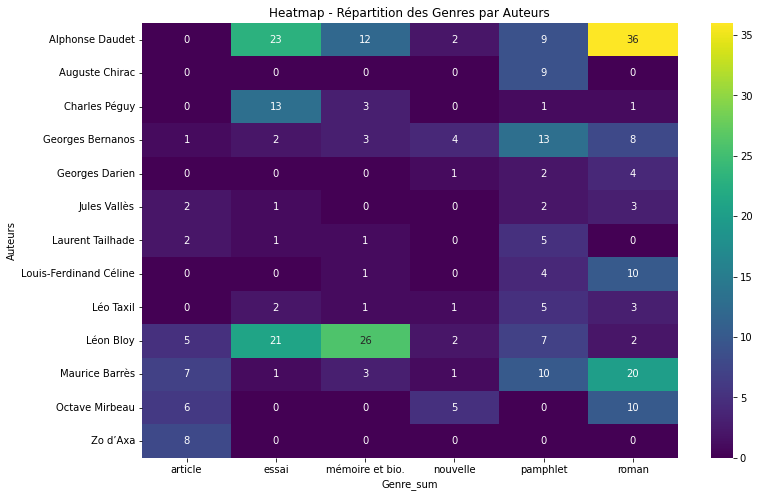

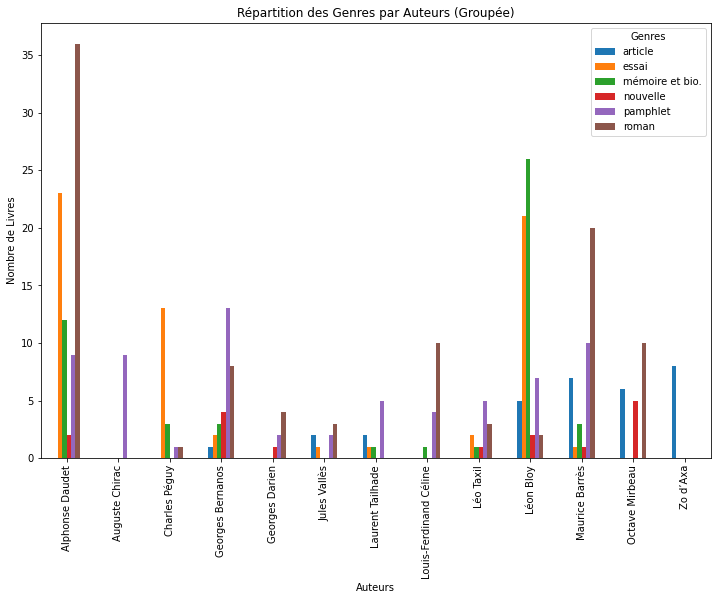

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Pour la répartition des genres par auteurs
genre_by_author = df.groupby(['Auteurs', 'Genre_sum']).size().unstack()
genre_by_author.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Répartition des Genres par Auteurs")
plt.xlabel("Auteurs")
plt.ylabel("Nombre de Livres")
plt.xticks(rotation=90)
plt.legend(title="Genres")
plt.show()

# Pour la répartition des auteurs par genres
author_by_genre = df.groupby(['Genre_sum', 'Auteurs']).size().unstack()
author_by_genre.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Répartition des Auteurs par Genres")
plt.xlabel("Genres")
plt.ylabel("Nombre de Livres")
plt.xticks(rotation=90)
plt.legend(title="Auteurs")
plt.show()

# Heatmap (Carte thermique)
heatmap_data = df.pivot_table(index='Auteurs', columns='Genre_sum', aggfunc='size', fill_value=0)
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt='d')
plt.title("Heatmap - Répartition des Genres par Auteurs")
plt.show()

# Diagramme à barres groupées
genre_by_author_grouped = df.groupby(['Auteurs', 'Genre_sum']).size().unstack()
genre_by_author_grouped.plot(kind='bar', figsize=(12, 8))
plt.title("Répartition des Genres par Auteurs (Groupée)")
plt.xlabel("Auteurs")
plt.ylabel("Nombre de Livres")
plt.xticks(rotation=90)
plt.legend(title="Genres")
plt.show()

In [8]:
texte_auteur_tot = df.Auteurs.value_counts()
filtre = df['Fichier'].notna()
texte_auteur = df.loc[filtre, 'Auteurs'].value_counts()

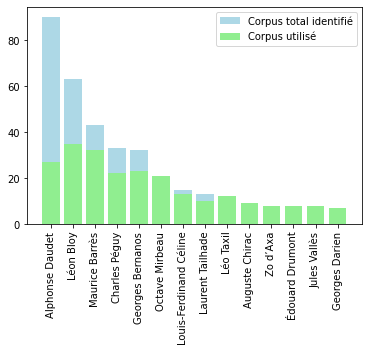

In [15]:
plt.bar(texte_auteur_tot.index, texte_auteur_tot.values, label='Corpus total identifié',color='lightblue')
plt.bar(texte_auteur.index, texte_auteur.values, label='Corpus utilisé',color='lightgreen')
plt.xticks(rotation=90)
plt.legend()

plt.show()

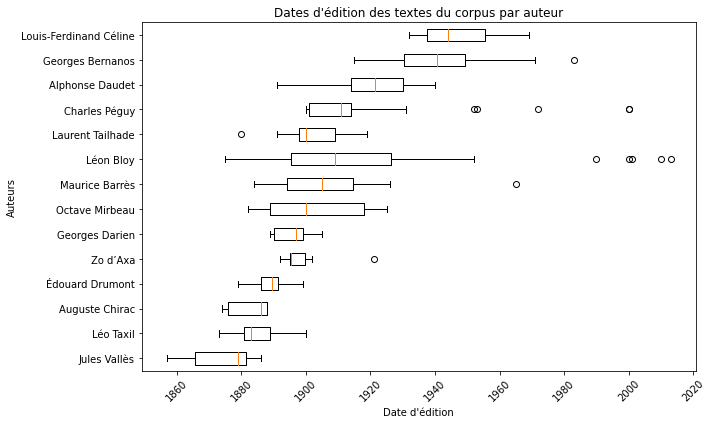

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

# Supposons que vous ayez un dataframe appelé "df" avec les colonnes "Auteurs" et "Date_edition"
# df = pd.read_csv('votre_fichier.csv')

custom_order = ["Jules Vallès", "Léo Taxil", "Auguste Chirac","Édouard Drumont", "Zo d’Axa", "Georges Darien", "Octave Mirbeau", "Maurice Barrès", "Léon Bloy", "Laurent Tailhade", "Charles Péguy", "Alphonse Daudet", "Georges Bernanos", "Louis-Ferdinand Céline"]

# Créer un dictionnaire pour stocker les dates d'édition par auteur
dates_by_author = {}

# Remplir le dictionnaire avec les dates d'édition
for author in custom_order:
    dates_by_author[author] = df[df["Auteurs"] == author]["Date_edition"].tolist()

plt.figure(figsize=(10, 6))

# Créer le boxplot en utilisant le dictionnaire et l'ordre personnalisé
plt.boxplot([dates_by_author[author] for author in custom_order], labels=custom_order, vert=False)

plt.xticks(rotation=45)
plt.ylabel("Auteurs")
plt.xlabel("Date d'édition")
plt.title("Dates d'édition des textes du corpus par auteur")
plt.tight_layout()
plt.show()
